### Script designed to probe Research Question 3:

- Does perceived discussion success relate to the emergence of coordination?

Hypothesis:

- More coordinated behaviour will be associated with higher ratings of average discussion success.

In [16]:
""""
Relevant variables in data files:
- roles:
    - p1_role: Role of participant 1 (0 = Agent, 1 = Target)
    - p2_role: Role of participant 2 (0 = Agent, 1 = Target)
    - agent_gen: Agent's gender (-1 = Female, 1 = Male)
    - target_gen: Target's gender (-1 = Female, 1 = Male)

- oua_conv:
    - AG_NDirect: Agent's Negative Direct scores
    - TG_NDirect: Target's Negative Direct scores
    - AG_PosDirect: Agent's Positive Direct scores
    - TG_PosDirect: Target's Positive Direct scores
    - AG_NIndirect: Agent's Negative Indirect scores
    - TG_NIndirect: Target's Negative Indirect scores
    - AG_PosIndirect: Agent's Positive Indirect scores
    - TG_PosIndirect: Target's Positive Indirect scores
"""

# Import libraries
import pandas as pd
from tqdm import tqdm as tqdm
from lmm_utils import *

# Load data
merged_crqa = pd.read_csv('merged_crqa_iaaft.csv') # Merged CRQA data
roles = pd.read_csv('role_metadata.csv') # Role metadata
oua_conv = pd.read_csv('ConvScores_Succ.csv') # Conversation scores

In [17]:
# Select appropriate DVs
dv_cols = [col for col in merged_crqa.columns if col.endswith(tuple(['REC', 'DET', 'MAXLINE', 'ENTROPY', 'LAM']))] # Identify DVs

# Remove surrogate pairs and causal discussion trials
merged_crqa = merged_crqa[merged_crqa['pair'] == 'actual'] # Exclude surrogates from analysis
merged_crqa = merged_crqa[merged_crqa['trial'] != 'trial0'] # Exclude the casual discussion.

# Define roles from the metadata
roles = roles[['couple', 'trial', 'agent_gen', 'target_gen']]

# Merge role data with CRQA data
merged_crqa = pd.merge(merged_crqa, roles, on=['couple', 'trial'])

# Print
print(merged_crqa.head(10))

   window_index  head_ed_vel_REC  head_ed_vel_DET  head_ed_vel_MAXLINE  \
0             0        10.628056        67.928325                 67.0   
1             1         8.503326        40.035244                 24.0   
2             2         3.992134        27.734113                  7.0   
3             3         7.007950        45.742647                 39.0   
4             4         6.632381        44.217524                 15.0   
5             5         6.827590        49.087197                 40.0   
6             6        10.483659        53.742469                 62.0   
7             7         3.440517        19.643918                  4.0   
8             8         2.356810        14.972160                  4.0   
9             9         6.341361        39.316019                 34.0   

   head_ed_vel_ENTROPY  head_ed_vel_MEANLINE  head_ed_vel_LAM  \
0             1.984420              3.307627         0.822159   
1             1.320405              2.521338         0.

In [18]:
"""
Compute rolling average to align conversation score with CRQA window index.

DataFrame 'merged_roll' contains the crqa and conversation(OUA) data.
DataFrame 'conv' contains the rolling average conversation scores.
"""

# Function to compute rolling average
def rolling_avg(group):
    cols = ['AG_NDirect', 'AG_NIndirect', 'AG_PosDirect', 'AG_PosIndirect',
            'TG_NDirect', 'TG_NIndirect', 'TG_PosDirect', 'TG_PosIndirect']
    
    for col in cols:
        # rolling average of current and next row
        group[f'{col}_roll'] = (group[col] + group[col].shift(-1)) / 2
    
    # window_index aligns with time - 1
    group['window_index'] = group['time'] - 1
    
    return group

# Apply rolling average function to each couple and trial
conv = oua_conv.groupby(['couple', 'trial'], group_keys=False).apply(rolling_avg)

# Select relevant columns
conv = conv[['couple', 'trial', 'window_index', 'AG_SUCC', 'TG_SUCC'] + 
            [f'{col}_roll' for col in ['AG_NDirect', 'AG_NIndirect', 'AG_PosDirect', 'AG_PosIndirect',
                                       'TG_NDirect', 'TG_NIndirect', 'TG_PosDirect', 'TG_PosIndirect']]]

# Merge rolling average conversation scores with CRQA data
merged_roll = pd.merge(merged_crqa, conv, on=['couple', 'trial', 'window_index'])

# Print
merged_roll.head(10)

C:\Users\Cathy\AppData\Local\Temp\ipykernel_35656\2190355501.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conv = oua_conv.groupby(['couple', 'trial'], group_keys=False).apply(rolling_avg)


,window_index,head_ed_vel_REC,head_ed_vel_DET,head_ed_vel_MAXLINE,head_ed_vel_ENTROPY,head_ed_vel_MEANLINE,head_ed_vel_LAM,head_ed_vel_DIV,head_ed_vel_MAXL_POSS,head_ed_vel_err_code,...,AG_SUCC,TG_SUCC,AG_NDirect_roll,AG_NIndirect_roll,AG_PosDirect_roll,AG_PosIndirect_roll,TG_NDirect_roll,TG_NIndirect_roll,TG_PosDirect_roll,TG_PosIndirect_roll
0,0,10.628056,67.928325,67.0,1.984420,3.307627,0.822159,0.014925,1484.0,0.0,...,7.0,6.0,1.00,2.00,2.25,3.00,2.50,1.25,2.00,2.00
1,1,8.503326,40.035244,24.0,1.320405,2.521338,0.723493,0.041667,1484.0,0.0,...,7.0,6.0,1.00,1.75,2.50,3.00,2.00,1.75,2.50,2.25
2,2,3.992134,27.734113,7.0,0.715302,2.179778,0.701935,0.142857,1484.0,0.0,...,7.0,6.0,1.25,2.00,3.00,2.50,2.00,1.75,1.50,2.00
3,3,7.007950,45.742647,39.0,1.403222,2.599359,0.730777,0.025641,1484.0,0.0,...,7.0,6.0,1.25,1.75,3.75,2.50,2.25,1.25,1.25,1.75
4,4,6.632381,44.217524,15.0,1.107042,2.359959,0.794827,0.066667,1484.0,0.0,...,7.0,6.0,1.00,1.75,3.50,2.50,1.25,1.00,2.25,2.00
5,5,6.827590,49.087197,40.0,1.961119,3.363624,0.778227,0.025000,1484.0,0.0,...,7.0,6.0,1.75,1.75,2.75,2.25,1.50,1.75,2.50,2.25
6,6,10.483659,53.742469,62.0,1.935405,3.296904,0.764346,0.016129,1484.0,0.0,...,7.0,6.0,2.50,1.50,2.75,2.50,1.50,1.75,1.50,2.25
7,7,3.440517,19.643918,4.0,0.100921,2.013256,0.837664,0.250000,1484.0,0.0,...,7.0,6.0,3.00,1.75,3.00,2.25,1.25,1.00,1.00,1.75
8,8,2.356810,14.972160,4.0,0.187671,2.031634,0.777103,0.250000,1484.0,0.0,...,7.0,6.0,2.75,2.00,3.00,2.25,1.75,1.50,1.25,1.75
9,9,6.341361,39.316019,34.0,1.510188,2.791783,0.745963,0.029412,1484.0,0.0,...,7.0,6.0,1.50,2.25,3.00,3.25,1.50,1.75,1.25,2.25


In [19]:
# Calculate difference scores for each conversation style.

merged_roll['PosDirect_diff'] = merged_roll['AG_PosDirect_roll'] - merged_roll['TG_PosDirect_roll']
merged_roll['PosIndirect_diff'] = merged_roll['AG_PosIndirect_roll'] - merged_roll['TG_PosIndirect_roll']
merged_roll['NDirect_diff'] = merged_roll['AG_NDirect_roll'] - merged_roll['TG_NDirect_roll']
merged_roll['NIndirect_diff'] = merged_roll['AG_NIndirect_roll'] - merged_roll['TG_NIndirect_roll']

print(merged_roll[['PosIndirect_diff', 'AG_PosIndirect_roll', 'TG_PosIndirect_roll']])

      PosIndirect_diff  AG_PosIndirect_roll  TG_PosIndirect_roll
0                 1.00                 3.00                 2.00
1                 0.75                 3.00                 2.25
2                 0.50                 2.50                 2.00
3                 0.75                 2.50                 1.75
4                 0.50                 2.50                 2.00
...                ...                  ...                  ...
3022              0.75                 2.75                 2.00
3023              1.00                 2.75                 1.75
3024              1.50                 3.00                 1.50
3025              1.25                 2.50                 1.25
3026              1.50                 2.75                 1.25

[3027 rows x 3 columns]


In [20]:
# Convert to long format and collapse data for analysis 

# Columns that represent differences
cols_diff = ["PosDirect_diff", "PosIndirect_diff", "NDirect_diff", "NIndirect_diff"]

# Melt into long format
roll_diff = merged_roll.melt(
    id_vars=["couple", "trial", "pair", 'AG_SUCC', 'TG_SUCC'] + dv_cols,  # keep trial, couple, and other DVs
    value_vars=cols_diff,
    var_name="conv_type",
    value_name="diff"
)

# Remove the '_diff' suffix to just keep the type
roll_diff["conv_type"] = roll_diff["conv_type"].str.replace("_diff", "", regex=False)

# Drop NA values if needed
roll_diff = roll_diff.dropna(subset=["diff"])

# Build list of columns to aggregate
dv_cols.append('diff')

# Collapse data by taking the mean of each DV for each couple, trial, pair, and conversation type
roll_diff = roll_diff.groupby(['couple', 'trial', 'pair', 'conv_type'])[dv_cols + ['AG_SUCC', 'TG_SUCC']].mean().reset_index()

# Print
roll_diff.head(10)

,couple,trial,pair,conv_type,head_ed_vel_REC,head_ed_vel_DET,head_ed_vel_MAXLINE,head_ed_vel_ENTROPY,head_ed_vel_LAM,headRel_ed_vel_REC,...,headRel_ed_vel_ENTROPY,headRel_ed_vel_LAM,body_ed_vel_REC,body_ed_vel_DET,body_ed_vel_MAXLINE,body_ed_vel_ENTROPY,body_ed_vel_LAM,diff,AG_SUCC,TG_SUCC
0,1,trial1,actual,NDirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.960269,0.441816,4.833086,23.292420,15.916667,0.853960,0.467768,0.222222,5.0,6.0
1,1,trial1,actual,NIndirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.960269,0.441816,4.833086,23.292420,15.916667,0.853960,0.467768,0.444444,5.0,6.0
2,1,trial1,actual,PosDirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.960269,0.441816,4.833086,23.292420,15.916667,0.853960,0.467768,0.486111,5.0,6.0
3,1,trial1,actual,PosIndirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.960269,0.441816,4.833086,23.292420,15.916667,0.853960,0.467768,-1.791667,5.0,6.0
4,1,trial2,actual,NDirect,5.852135,50.869217,36.857143,1.661207,0.695134,3.410944,...,0.832874,0.400870,5.748586,32.327498,18.142857,1.043963,0.543419,-0.642857,2.0,3.0
5,1,trial2,actual,NIndirect,5.852135,50.869217,36.857143,1.661207,0.695134,3.410944,...,0.832874,0.400870,5.748586,32.327498,18.142857,1.043963,0.543419,-1.000000,2.0,3.0
6,1,trial2,actual,PosDirect,5.852135,50.869217,36.857143,1.661207,0.695134,3.410944,...,0.832874,0.400870,5.748586,32.327498,18.142857,1.043963,0.543419,-0.190476,2.0,3.0
7,1,trial2,actual,PosIndirect,5.852135,50.869217,36.857143,1.661207,0.695134,3.410944,...,0.832874,0.400870,5.748586,32.327498,18.142857,1.043963,0.543419,1.142857,2.0,3.0
8,2,trial1,actual,NDirect,9.454146,48.485119,26.166667,1.386203,0.603210,3.297951,...,0.696180,0.352776,4.008715,17.153244,10.333333,0.599740,0.268149,0.416667,5.5,6.0
9,2,trial1,actual,NIndirect,9.454146,48.485119,26.166667,1.386203,0.603210,3.297951,...,0.696180,0.352776,4.008715,17.153244,10.333333,0.599740,0.268149,-0.250000,5.5,6.0


In [21]:
# Descriptive Statistics

dv = 'mean_succ'  # Change this to compute stats for different DVs
roll_diff['mean_succ'] = roll_diff[['AG_SUCC', 'TG_SUCC']].mean(axis=1)
couple_avg = roll_diff.groupby(['couple', 'trial'])[dv].mean().reset_index()

# Trial-level stats
trial_stats = couple_avg.groupby(['trial'])[dv].agg(['mean', 'std', 'min', 'max', 'count'])
print("Trial-level stats:\n", trial_stats)

Trial-level stats:
             mean       std  min   max  count
trial                                       
trial1  4.730916  1.226164  1.5  6.75    131
trial2  4.763462  1.253411  1.0  7.00    130


In [22]:
# Center all continuous IVs.

covs = ['AG_NDirect_roll', 'TG_NDirect_roll', 'AG_PosDirect_roll', 'TG_PosDirect_roll', 
        'AG_NIndirect_roll', 'TG_NIndirect_roll', 'AG_PosIndirect_roll', 'TG_PosIndirect_roll']

for c in covs:
    merged_roll[f'{c}_c'] = merged_roll[c] - merged_roll[c].mean()

roll_diff['diff_c'] = roll_diff['diff'] - roll_diff['diff'].mean()

rqa_covs = [
    'diff',
    'headRel_ed_vel_REC', 'headRel_ed_vel_DET', 'headRel_ed_vel_MAXLINE',
    'headRel_ed_vel_ENTROPY', 'headRel_ed_vel_LAM',
    'body_ed_vel_REC', 'body_ed_vel_DET', 'body_ed_vel_MAXLINE',
    'body_ed_vel_ENTROPY', 'body_ed_vel_LAM'
]

for c in rqa_covs:
    roll_diff[f'{c}_c'] = roll_diff[c] - roll_diff[c].mean()

In [23]:
roll_diff

,couple,trial,pair,conv_type,head_ed_vel_REC,head_ed_vel_DET,head_ed_vel_MAXLINE,head_ed_vel_ENTROPY,head_ed_vel_LAM,headRel_ed_vel_REC,...,headRel_ed_vel_REC_c,headRel_ed_vel_DET_c,headRel_ed_vel_MAXLINE_c,headRel_ed_vel_ENTROPY_c,headRel_ed_vel_LAM_c,body_ed_vel_REC_c,body_ed_vel_DET_c,body_ed_vel_MAXLINE_c,body_ed_vel_ENTROPY_c,body_ed_vel_LAM_c
0,1,trial1,actual,NDirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.799350,3.921269,1.670447,0.122205,0.084856,1.441816,8.095520,6.111933,0.275415,0.176948
1,1,trial1,actual,NIndirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.799350,3.921269,1.670447,0.122205,0.084856,1.441816,8.095520,6.111933,0.275415,0.176948
2,1,trial1,actual,PosDirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.799350,3.921269,1.670447,0.122205,0.084856,1.441816,8.095520,6.111933,0.275415,0.176948
3,1,trial1,actual,PosIndirect,9.002344,57.633262,41.333333,1.723512,0.677723,4.173308,...,0.799350,3.921269,1.670447,0.122205,0.084856,1.441816,8.095520,6.111933,0.275415,0.176948
4,1,trial2,actual,NDirect,5.852135,50.869217,36.857143,1.661207,0.695134,3.410944,...,0.036986,1.670606,1.420447,-0.005189,0.043909,2.357316,17.130598,8.338124,0.465418,0.252598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,199,trial1,actual,PosIndirect,5.274265,31.245000,16.272727,0.902053,0.434913,2.995255,...,-0.378702,-2.795351,-0.943189,-0.034382,-0.030070,-0.845975,-3.654261,-2.986552,-0.111274,-0.050726
1040,199,trial2,actual,NDirect,6.332174,34.823612,19.923077,1.055417,0.562658,3.138687,...,-0.235270,-5.258072,-4.579553,-0.173201,0.005951,-0.649337,-3.350009,-2.343195,-0.073235,-0.042383
1041,199,trial2,actual,NIndirect,6.332174,34.823612,19.923077,1.055417,0.562658,3.138687,...,-0.235270,-5.258072,-4.579553,-0.173201,0.005951,-0.649337,-3.350009,-2.343195,-0.073235,-0.042383
1042,199,trial2,actual,PosDirect,6.332174,34.823612,19.923077,1.055417,0.562658,3.138687,...,-0.235270,-5.258072,-4.579553,-0.173201,0.005951,-0.649337,-3.350009,-2.343195,-0.073235,-0.042383


In [24]:
# Construct Linear Mixed Effects Models

df = roll_diff.copy()


crqa_dv = 'headRel_ed_vel_REC_c' # Set CRQA index (e.g., body_ed_vel_REC_c), Note: _c = centered.
CRQAs = [col for col in df.columns if col.endswith(crqa_dv)] # Change to suffix of DV of interest (e.g., REC, DET, LAM)

# Store p-values
p_values = {}
effect_sizes = {}
conf_intervals = {}
r2_values = {}

simple_effects = []

categorical_vars = ['conv_type']
for var in categorical_vars:
    df[var] = df[var].astype('category')

for crqa in CRQAs:
    # df[f'{crqa}_c'] = df[crqa] - df[crqa].mean()
    dv= "mean_succ"
    formula = f"{dv} ~ {crqa} + (diff_c * C(conv_type, Treatment(reference='PosDirect')))"

    try:
        model = smf.mixedlm(
            formula,
            df,
            groups=df["couple"]
        ).fit(reml=False)

        R2_m, R2_c = r2_marginal_conditional(model)
        print(f"Marginal R² (fixed): {R2_m:.3f}")
        print(f"Conditional R² (fixed + random): {R2_c:.3f}")

        print(f"\nMixed-Effects Model for {dv}:")
        print(model.summary())


        r2_values[dv] = {"R2_marginal": R2_m, "R2_conditional": R2_c}

    
    except Exception as e:
        print(f"Error fitting model for {dv}: {e}")

Marginal R² (fixed): 0.008
Conditional R² (fixed + random): 0.740

Mixed-Effects Model for mean_succ:
                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   mean_succ 
No. Observations:                    1044                      Method:                               ML        
No. Groups:                          131                       Scale:                                0.3985    
Min. group size:                     4                         Log-Likelihood:                       -1207.5809
Max. group size:                     8                         Converged:                            Yes       
Mean group size:                     8.0                                                                       
---------------------------------------------------------------------------------------------------------------
                                       

In [25]:
"""
This sections used to compute estimated marginal means, pairwise comparisons, and simple slopes. 

Function (emmeans_with_slopes_rm) parameters:
    - model: The LMM fitted above. 
    - factors: Categorical IVs included in the model
    - covariates: Continuous IVs included in the model
    - p_correction: Method for p-value correction. (Alternatives: 'bonferroni', 'holm', None).
    - comparison_type: Type of pairwise comparisons to perform. Relevant options include (besides None):
        NOTE: Options assume IVs pair and trial. If pair is not included, set comparison_type = 'all' or None.
Outputs: 
    - emmeans_df: Estimated marginal means for each factor level at covariate = 0 (mean centered).
    - slopes_df: Simple slopes for each covariate.
    - pairwise_df: Pairwise comparisons.
    - slope_contrasts_df: Contrasts of simple slopes.
"""

emmeans_df, slopes_df, pairwise_df, slope_contrasts_df = emmeans_with_slopes_rm(
    model,
    factors=["conv_type"],
    covariates=["diff_c", crqa],
    p_correction="fdr_bh",
    comparison_type='all'
    )

print(emmeans_df)
print("\n------------------------------------------------------------------------\n")
# Simple slopes
print(slopes_df)
print("\n------------------------------------------------------------------------\n")
print(pairwise_df)

     conv_type  diff_c  headRel_ed_vel_REC_c   emmeans        se     lower  \
0      NDirect       0                     0  4.739621  0.100426  4.542559   
1    NIndirect       0                     0  4.759094  0.100622  4.561646   
2    PosDirect       0                     0  4.752013  0.100481  4.554843   
3  PosIndirect       0                     0  4.751356  0.100434  4.554279   

      upper  
0  4.936683  
1  4.956541  
2  4.949184  
3  4.948433  

------------------------------------------------------------------------

     conv_type             covariate     slope        se         t      p  \
0      NDirect                diff_c  0.121849  0.046440  2.623812  0.009   
1    NIndirect                diff_c  0.088385  0.037567  2.352702  0.019   
2    PosDirect                diff_c -0.087060  0.039821 -2.186260  0.029   
3  PosIndirect                diff_c -0.170971  0.045749 -3.737176  0.000   
4         None  headRel_ed_vel_REC_c  0.000141  0.034096  0.004145  0.997   

 


-------------------- TESTING DV: mean_succ --------------------


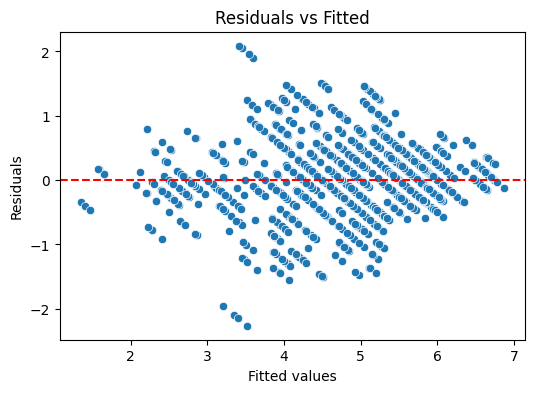

Breusch-Pagan test could not be performed: name 'het_breuschpagan' is not defined


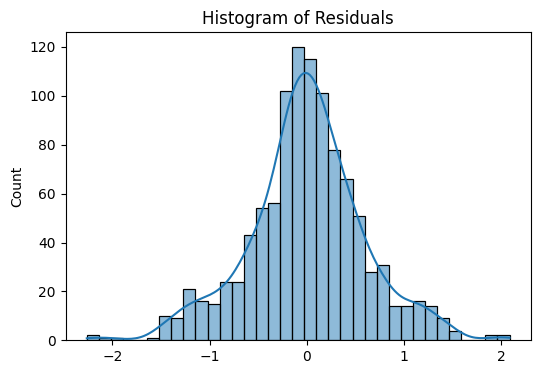

Shapiro-Wilk test for residuals: stat=0.986, p=0.000
Residuals NOT Gaussian (reject H0)
D'Agostino-Pearson test for residuals: stat=19.881, p=0.000


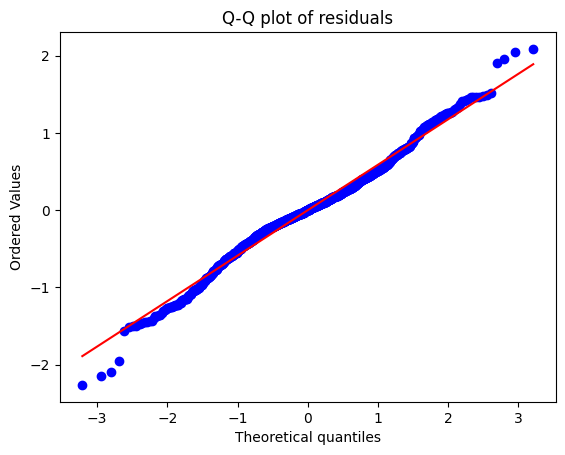

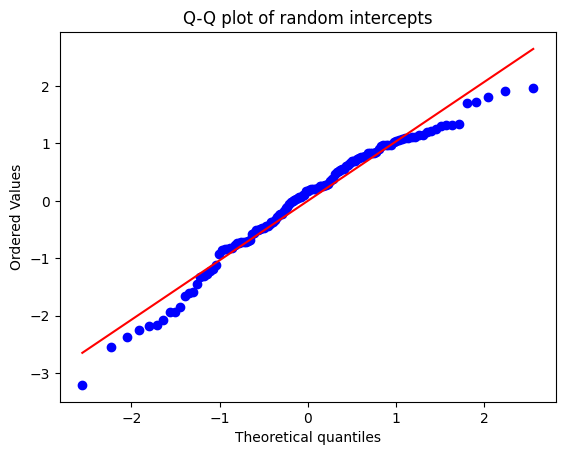

Shapiro-Wilk test for random intercepts: stat=0.969, p=0.004
Random intercepts NOT Gaussian


In [26]:
assumptions(df=df, DVs=['mean_succ'], formula="~ headRel_ed_vel_REC * C(conv_type) * diff_c")